In [109]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [110]:
df_credit = pd.read_csv("./train.csv")

df_credit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [111]:
df = df_credit.copy()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [113]:
df.shape

(614, 13)

verifier si on a des valeurs manquantes

In [114]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Pour supprimer les valeurs manquantes :
- Pour les variables catégoriquesn on va les remplacer par le mode
- Pour les variables nuémriques , on va les remplacer par la moyenne ou la mediane

In [115]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [116]:
var_cat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

print('Les variables categoriques sont :', var_cat)
print('Les variables numeriques sont :', var_num)

Les variables categoriques sont : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
Les variables numeriques sont : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [117]:
# Supprimer les valeurs manquantes coté variables categoriques
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True) 
df['Married'].fillna(df['Married'].mode()[0],inplace=True)  
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)  
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True) 

In [118]:
# Supprimer les valeurs manquantes coté variables numeriques
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True) 
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

fonction pour remplacer les valeurs manquantes

In [119]:
def trans(data):
    for c in data.columns:
        if data[c].dtype== 'int64' or data[c].dtype=='float64':
            data[c].fillna(data[c].median(), inplace=True)
        else:
            data[c].fillna(data[c].mode()[0], inplace=True)

In [120]:
trans(df)

In [121]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Analyse univariée

In [122]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [123]:
df['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

In [124]:
#df["Loan_Status"].value_counts(normalize=True).plot.bar(title="Credit accordé ou pas")


fig = px.histogram(df, x="Loan_Status", title="Credit accordé ou pas", color="Loan_Status", template="plotly_dark")
fig.show(font = dict(size=17, family='Franklin Gothic'))

les Variables catégoriques

In [125]:
df["Gender"].value_counts(normalize=True)*100

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

In [126]:
#df['Gender'].value_counts().plot.bar(title="Comparaisons des seces")

fig = px.histogram(df, x='Gender', title='Genre', color='Gender', template="plotly_dark")
fig.show(font= dict(size=17, family='Franklin Gothic'))

Married, Self_employed, Credit_history

In [127]:
df['Married'].value_counts(normalize=True)*100

Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64

<Axes: title={'center': 'Nombres de gens marriés'}, xlabel='Married'>

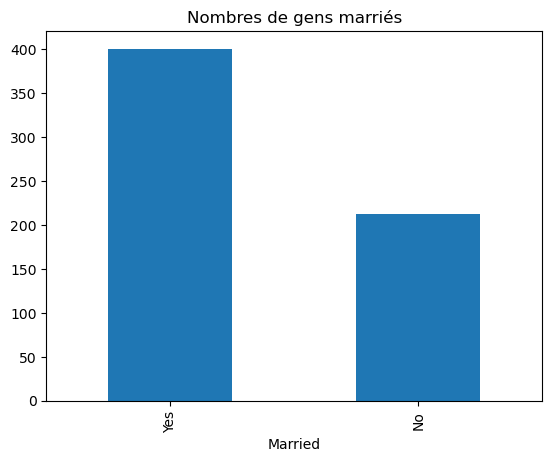

In [128]:
df['Married'].value_counts().plot.bar(title="Nombres de gens marriés")

Depends

In [129]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: title={'center': 'Le nombre d enfants'}, xlabel='Dependents'>

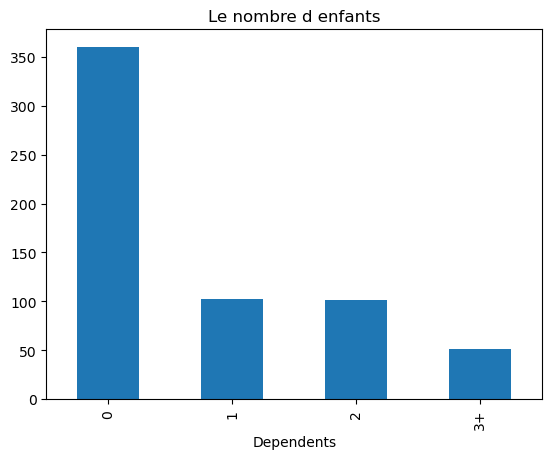

In [130]:
df['Dependents'].value_counts().plot.bar(title="Le nombre d enfants")

### Les variables numériques

In [131]:
var_num

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [132]:
df[var_num].describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [134]:
fig = px.histogram(df, x="ApplicantIncome", facet_col='Loan_Status', marginal="box", color="Loan_Status")

fig.show()

In [135]:
#LoanAmount

fig = px.histogram(df, x="LoanAmount", facet_col="Loan_Status", marginal="box", color='Loan_Status')

fig.show()

In [136]:
# applicantincome

#plt.figure(1)
#plt.subplot(121)
#sns.distplot(df['ApplicantIncome'])

#plt.subplot(122)
#df['ApplicantIncome'].plot.box(figsize=(16,5))
#plt.suptitle('')
#plt.show()

## Analyse bivariée

In [137]:
var_cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [138]:
df['Credit_History'] = df["Credit_History"].replace(1.0, 'Yes')
df['Credit_History'] = df["Credit_History"].replace(0.0, 'No')

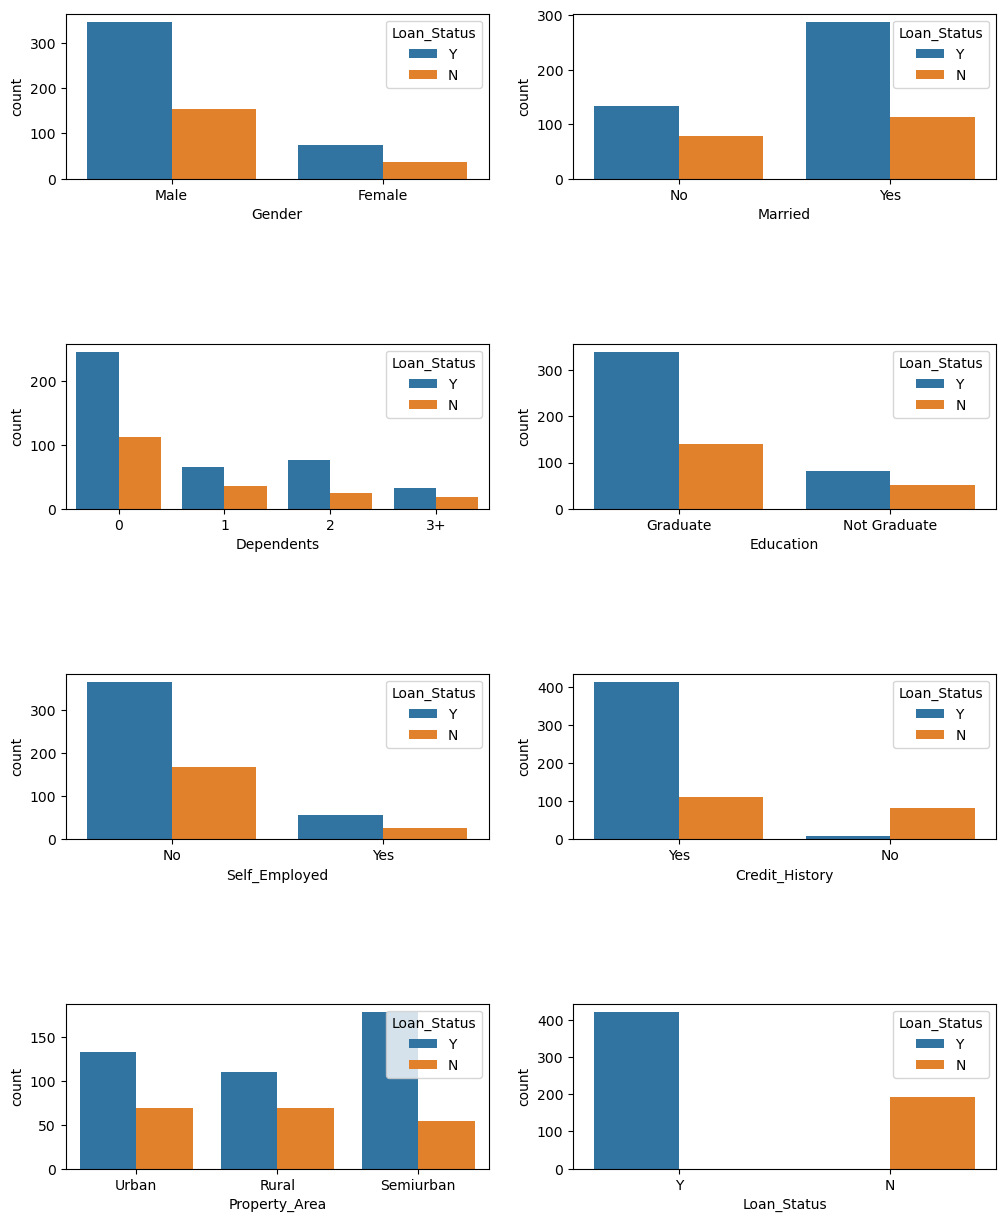

In [139]:
# les variables catégoriques
fig,axes= plt.subplots(4,2,figsize=(12,15))
for idx, cat_col in enumerate(var_cat):
    row,col =idx//2, idx%2
    sns.countplot(x=cat_col,data=df, hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

Matrice de correlation des variables numeriques

appliquer la matrice de correlation uniquement sur les valeur numeriques du dataframe

<Axes: >

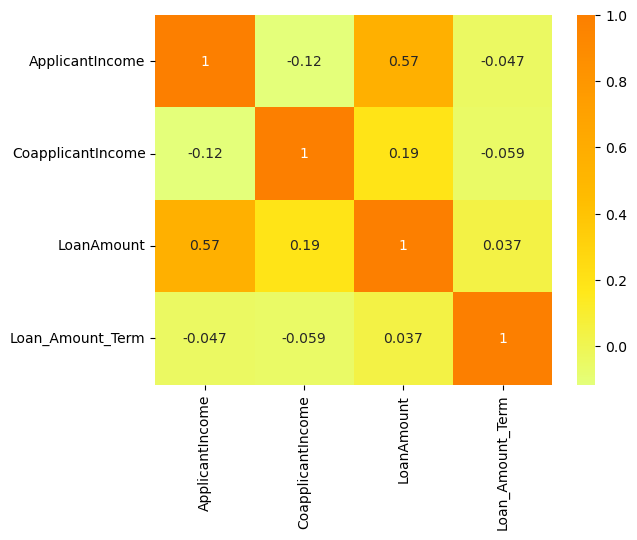

In [142]:
sns.heatmap(df[var_num].corr(),cmap = 'Wistia', annot= True)


# Creation du modele

In [143]:
df_num = df[var_num]
df_cat =  df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,Yes,Rural,N
2,Male,Yes,0,Graduate,Yes,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Yes,Urban,Y
4,Male,No,0,Graduate,No,Yes,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Yes,Rural,Y
610,Male,Yes,3+,Graduate,No,Yes,Rural,Y
611,Male,Yes,1,Graduate,No,Yes,Urban,Y
612,Male,Yes,2,Graduate,No,Yes,Urban,Y


In [144]:
df_cat = pd.get_dummies(df_cat, drop_first=True)
df_cat

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,True,False,False,False,False,False,False,True,False,True,True
1,True,True,True,False,False,False,False,True,False,False,False
2,True,True,False,False,False,False,True,True,False,True,True
3,True,True,False,False,False,True,False,True,False,True,True
4,True,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,True,False,False,True
610,True,True,False,False,True,False,False,True,False,False,True
611,True,True,True,False,False,False,False,True,False,True,True
612,True,True,False,True,False,False,False,True,False,True,True


In [145]:
df_encoded = pd.concat([df_cat, df_num], axis=1)
df_encoded

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,True,False,False,False,False,False,False,True,False,True,True,5849,0.0,128.0,360.0
1,True,True,True,False,False,False,False,True,False,False,False,4583,1508.0,128.0,360.0
2,True,True,False,False,False,False,True,True,False,True,True,3000,0.0,66.0,360.0
3,True,True,False,False,False,True,False,True,False,True,True,2583,2358.0,120.0,360.0
4,True,False,False,False,False,False,False,True,False,True,True,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,True,False,False,True,2900,0.0,71.0,360.0
610,True,True,False,False,True,False,False,True,False,False,True,4106,0.0,40.0,180.0
611,True,True,True,False,False,False,False,True,False,True,True,8072,240.0,253.0,360.0
612,True,True,False,True,False,False,False,True,False,True,True,7583,0.0,187.0,360.0


In [146]:
y = df_encoded["Loan_Status_Y"]
y

0       True
1      False
2       True
3       True
4       True
       ...  
609     True
610     True
611     True
612     True
613    False
Name: Loan_Status_Y, Length: 614, dtype: bool

In [147]:
x = df_encoded.drop("Loan_Status_Y", axis=1)
x

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,True,False,False,False,False,False,False,True,False,True,5849,0.0,128.0,360.0
1,True,True,True,False,False,False,False,True,False,False,4583,1508.0,128.0,360.0
2,True,True,False,False,False,False,True,True,False,True,3000,0.0,66.0,360.0
3,True,True,False,False,False,True,False,True,False,True,2583,2358.0,120.0,360.0
4,True,False,False,False,False,False,False,True,False,True,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,True,False,False,2900,0.0,71.0,360.0
610,True,True,False,False,True,False,False,True,False,False,4106,0.0,40.0,180.0
611,True,True,True,False,False,False,False,True,False,True,8072,240.0,253.0,360.0
612,True,True,False,True,False,False,False,True,False,True,7583,0.0,187.0,360.0


In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [149]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=6)

In [150]:
model= LogisticRegression()
model.fit(X_train, y_train)
fiabilite = model.score(X_test, y_test)*100
print("Votre model est fiable à:", fiabilite, '%')


Votre model est fiable à: 85.36585365853658 %
